### NAME : Salunke Siddhi Bharat
### R.NO : 24207150
### BATCH : B (TY-A)
# ASSIGNMENT NO : 03
### TITLE : 
Develop a sentiment analysis model to analyze customer reviews of products or services. 

## 1. Import Required Libraries

In [253]:
import pandas as pd
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## 2. Load Dataset

In [256]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


## 2. Check Missing Values

In [259]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

## 3. Dataset Cleaning
✔ Strategy:

Drop rows with missing Review Text (cannot analyze sentiment without text)

Fill missing Title with empty string

Fill categorical missing values with mode

In [265]:
df = df.dropna(subset=['Review Text'])

df['Title'] = df['Title'].fillna("")

for col in ['Division Name', 'Department Name', 'Class Name']:
    df[col] = df[col].fillna(df[col].mode()[0])

## 3. Select Required Columns

In [267]:
data = df[['Title', 'Review Text', 'Rating']].copy()


## 4. Create Sentiment Labels

### Remove neutral reviews (rating = 3)

In [271]:
data = data[data['Rating'] != 3]

### Create sentiment column
### Positive → 1 (4,5)
### Negative → 0 (1,2)

In [274]:
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

## 5. Text Preprocessing
Steps:

✔ Lowercasing
✔ Remove punctuation
✔ Remove numbers
✔ Remove extra spaces

In [277]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['CleanReview'] = data['Review Text'].apply(preprocess_text)


### Code to Check Class Balance
Count number of samples in each sentiment class

In [280]:
sentiment_counts = data['Sentiment'].value_counts()

print(sentiment_counts)


Sentiment
1    17448
0     2370
Name: count, dtype: int64


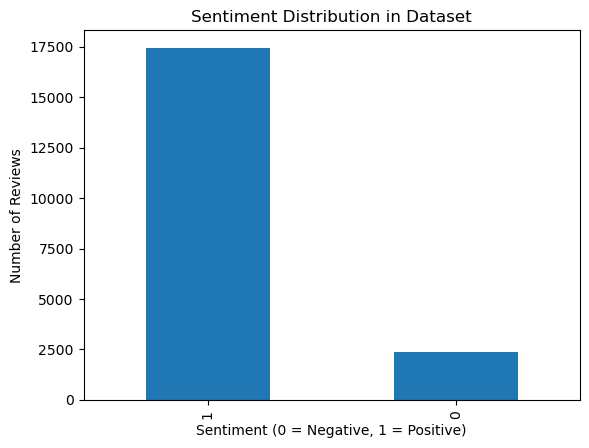

In [282]:
import matplotlib.pyplot as plt

data['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution in Dataset")
plt.show()


## 6. Train-Test Split

In [285]:
from sklearn.model_selection import train_test_split

X = data['CleanReview']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Feature Extraction (TF-IDF)

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## 8. Train Sentiment Model

In [291]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=200,
    class_weight='balanced'
)

model.fit(X_train_tfidf, y_train)



LogisticRegression(class_weight='balanced', max_iter=200)

## 9. Model Evaluation

In [294]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9048940464177598
              precision    recall  f1-score   support

           0       0.57      0.84      0.68       478
           1       0.98      0.91      0.94      3486

    accuracy                           0.90      3964
   macro avg       0.77      0.88      0.81      3964
weighted avg       0.93      0.90      0.91      3964



## 10. Predict Sentiment for New Reviews

In [299]:
new_reviews = [
    "The fabric quality is excellent and very comfortable",
    "The dress fitting is bad and material is cheap"
]

new_reviews_clean = [preprocess_text(r) for r in new_reviews]
new_reviews_vec = vectorizer.transform(new_reviews_clean)

predictions = model.predict(new_reviews_vec)

for review, sentiment in zip(new_reviews, predictions):
    print(review, "->", "Positive" if sentiment == 1 else "Negative")


The fabric quality is excellent and very comfortable -> Positive
The dress fitting is bad and material is cheap -> Negative
